In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

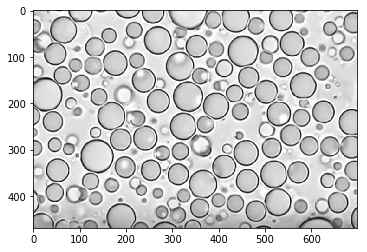

In [4]:
img = cv2.imread("datasets/images/milk.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap="gray")
plt.show()

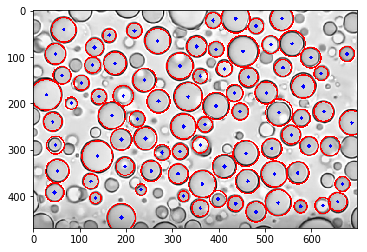

In [6]:
circles = cv2.HoughCircles(img, 
                           cv2.HOUGH_GRADIENT,
                           dp=1,       # internal ratio parameter, usually 1
                           minDist=30, # between centers
                           param1=50,  # parameters of mode (canny edge)
                           param2=50,  # bigger - less false positives
                           minRadius=10,
                           maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg, (*i[:2],), i[2], (255,0,0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (*i[:2],), 2, (0,0,255), 3)
plt.imshow(cimg)
plt.show()

Original


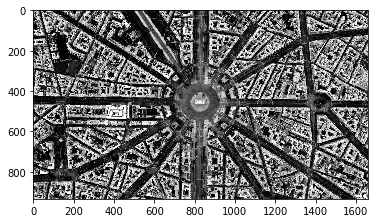

Blurred


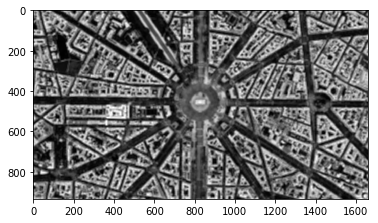

Edges highlighted


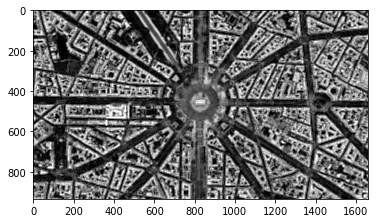

Median blur


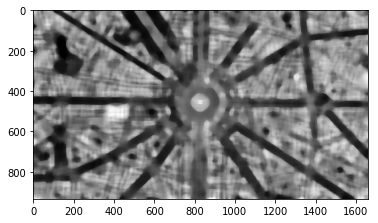

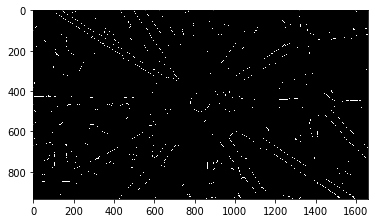

In [152]:
# https://docs.opencv.org/3.1.0/d6/d10/tutorial_py_houghlines.html
img = cv2.imread("datasets/images/paris.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print("Original")
plt.imshow(img, cmap="gray")
plt.show()
m = cv2.GaussianBlur(img, ksize=(11, 11), sigmaX=11)
print("Blurred")
plt.imshow(m, cmap="gray")
plt.show()

# highlight edges: apply convolution
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
m = cv2.filter2D(m, -1, kernel)
print("Edges highlighted")
plt.imshow(m, cmap="gray")
plt.show()

print("Median blur")
m = cv2.medianBlur(m, 35)
plt.imshow(m, cmap="gray")
plt.show()
edges = cv2.Canny(m, 50, 100) # sure not edge if lower minVal, and sure edge, if bigger maxVal
plt.imshow(edges, cmap="gray")
plt.show()

<class 'numpy.ndarray'> (8, 1, 4)
<class 'numpy.ndarray'> (8, 4)
(93, 1) (622, 344)
(915, 487) (1584, 922)
(143, 0) (653, 331)
(1024, 605) (1524, 929)
(2, 670) (2, 67)
(661, 275) (1112, 919)
(147, 2) (657, 333)
(106, 10) (617, 342)


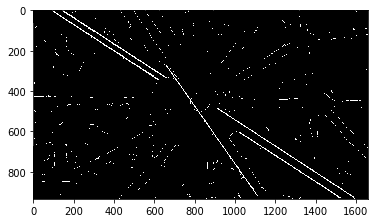

In [153]:
lines = cv2.HoughLinesP(
        edges,
        rho=1,             # distance resolution
        theta=np.pi/180,   # angle resolution
        threshold=0,
        minLineLength=500,
        maxLineGap=100
)
print(type(lines), lines.shape)
lines = lines.reshape((lines.shape[0], 4))
print(type(lines), lines.shape)
result = edges[:,:]
for x1, y1, x2, y2 in lines:
    print((x1, y1), (x2, y2))
    cv2.line(result, (x1, y1), (x2, y2), 255, 3)
plt.imshow(result, cmap="gray")
plt.show()